# Career Switch to Data Scientist
2019 Kaggle ML & DS Survey by Fanny Ummelen, 2019-11-15 

I am an aspiring data scientist, but have not attained formal education in that field. Is making such a career switch wise, and is it even possible? To answer these questions, I will study a subgroup of this survey of people who found a job as a data scientist but are relatively new to that field, and with a similar level of education as myself. What kind of tasks does their job comprise of? At what kind of companies do they work? Do they receive a nice salary? Which languages and tools should I familiarize myself with?

In this notebook the following points/questions are covered: 

* Is such a career switch even possible?
    * How many respondents are in the subgroup?
    * What are the basic properties (gender, age, country) of the people in the subgroup?
* Working situation
    * How much money do they earn?
    * What kind of company do they work for?
    * What are their tasks at work?
* Coding habits
    * Languages used
    * Tools used

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import OneHotEncoder
import itertools
import os
import warnings
import scipy.stats as ss
import matplotlib.gridspec as gridspec

def fxn():
    warnings.warn("warning", FutureWarning)
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

def plot_style():
    sns.set_context(context = 'talk')
    palette = 'Set1'
    color_list = sns.color_palette('Set1', n_colors=9) + sns.color_palette('Set3', n_colors=12)
    return palette, color_list

def simple_bar(df, question_text, question = 'Q1', x = 'Age'):
    palette, color_list = plot_style()
    fig = plt.figure(figsize = ([8, 8]))
    title = question_text.loc[0, question]
    sns.barplot(x = df[question], y = df['Count'], palette = palette)
    plt.subplots_adjust(left=0.2, bottom=0.25)
    plt.xticks(rotation = 90)
    plt.xlabel(x)
    plt.ylabel('# Responses')
    plt.title(title)
    plt.show()
    
def simple_bar_color(df, question_text, question = 'Q1', hue = 'gender_ratio', x = 'Age'):
    palette, color_list = plot_style()
    palette = 'coolwarm'
    fig = plt.figure(figsize = ([10, 8]))
    title = question_text.loc[0, question]
    norm = plt.Normalize(df[hue].min(), df[hue].max())
    sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])
    ax = sns.barplot(x = df[question], y = df.Count, palette = palette, hue = df[hue], dodge=False)
    plt.subplots_adjust(left=0.2, bottom=0.25)
    plt.xticks(rotation = 90)
    plt.xlabel(x)
    ax.get_legend().remove()
    cbar = plt.colorbar(sm)
    cbar.set_label('% Female', rotation = 90)
    plt.ylabel('# Responses')
    plt.title(title)
    plt.show()


In [2]:
# # import data
# multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv")
# other_text_responses = pd.read_csv("../input/kaggle-survey-2019/other_text_responses.csv")
# questions_only = pd.read_csv("../input/kaggle-survey-2019/questions_only.csv")
# survey_schema = pd.read_csv("../input/kaggle-survey-2019/survey_schema.csv")

# Identify and explore the subgroup
First of all, to identify the subgroup with the desired level of education, lets have a look at question 4 "What is the highest level of education that you have attained or plan to attain within the next 2 years?". There are 2767 respondents who answered 'doctoral degree'. I only want to include people who already attained their degree, so as an additional criterium repondents are only selected if they did not answer "student" to question 5 "Select the title most similar to your current role", after which 2467 respondents are left. This is 12.5% of the all survey participants, which is much more than the typical percentage of the population with a PhD. Kaggelers are highly educated!

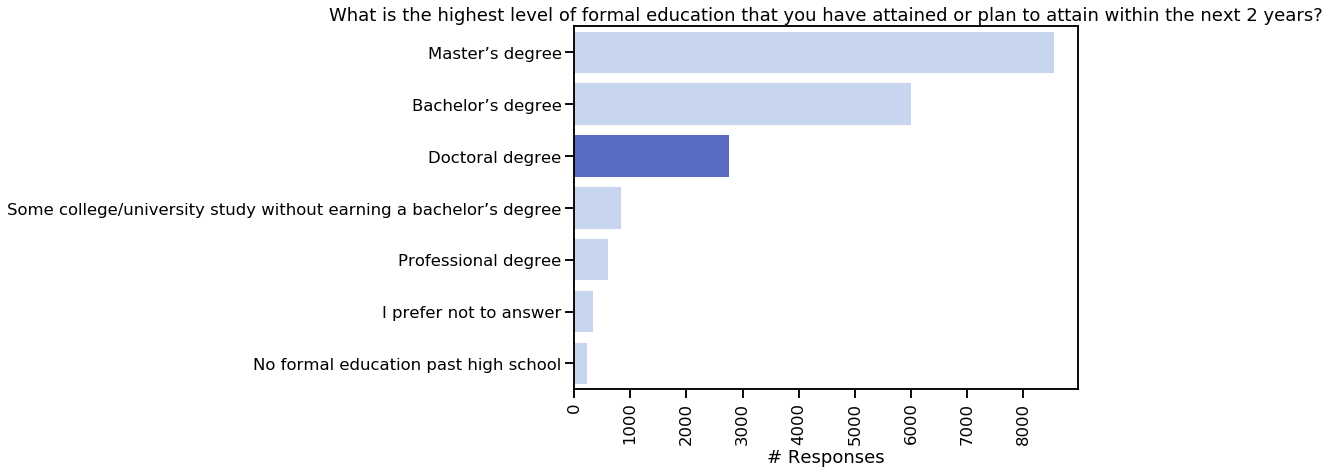

In [3]:
multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv", dtype = str)   
multiple_choice_question = multiple_choice_responses.head(1)
multiple_choice_responses.drop([0], inplace = True)

df_grouped_edu = multiple_choice_responses.groupby(['Q4'])['Time from Start to Finish (seconds)'].count().sort_values(ascending=False).reset_index()
df_grouped_edu.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)
palette, color_list = plot_style()
color_list = sns.color_palette('Paired', n_colors=2)
fig = plt.figure(figsize = ([10, 8]))
cmap = matplotlib.cm.get_cmap('coolwarm')
clrs = [cmap(0.05) if (x == 2767) else cmap(0.4) for x in df_grouped_edu['Count'] ]
sns.barplot(y = df_grouped_edu['Q4'], x = df_grouped_edu['Count'], palette = clrs )
plt.subplots_adjust(left=0.2, bottom=0.25)
plt.xticks(rotation = 90)
plt.ylabel('')
plt.xlabel('# Responses')
plt.title(multiple_choice_question.loc[0, 'Q4'])
plt.show()
my_group = multiple_choice_responses[multiple_choice_responses['Q4'] == 'Doctoral degree']
# print(len(my_group) * 100 / len(multiple_choice_responses))
my_group1 = my_group[my_group.Q5 != 'Student']
# print(len(my_group1))
# print(len(my_group1) * 100 / len(multiple_choice_responses))

As mentioned in the introduction, I am interested in the subgroup of respondents who have a doctoral degree, but come from a different background than data science. We can be quite confident that everyone who has less than 3 years of experience with machine learning (ML) did not follow a data science (or related) study. Here the ages of the PhD subgroup are plotted and also the number of years of experience with ML is shown. The portion of people with less than 3 years of ML experience is at least 30 percent, even for the higher age categories. 

There are 829 (4.2% of the total number of respondents) respondents in this survey with a doctoral degree and at most 3 years of ML experience, and this will be the subgroup of my story.

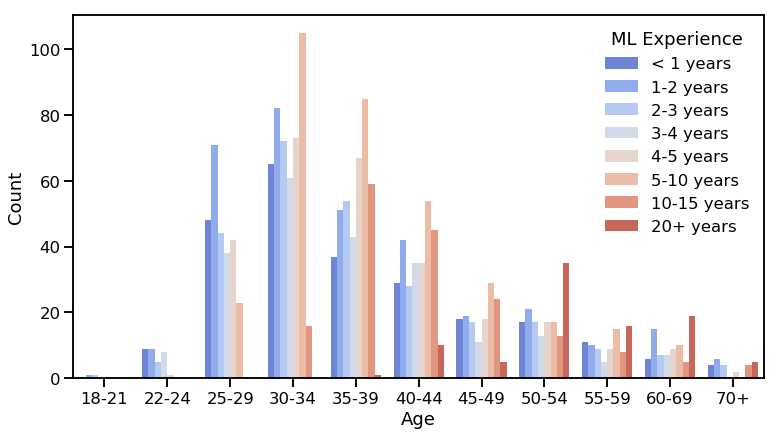

In [14]:
phd_age_code_time = my_group1.groupby(['Q1','Q23'])['Time from Start to Finish (seconds)'].count().reset_index()
phd_age_code_time.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)
fig = plt.figure(figsize = (16, 8))
hue_order = ['< 1 years', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-15 years', '20+ years']
sns.barplot(x = phd_age_code_time['Q1'], y = phd_age_code_time.Count, palette = "coolwarm", hue = phd_age_code_time['Q23'], hue_order = hue_order)
plt.subplots_adjust(left = 0.1, right = 0.7, bottom = 0.25)
plt.legend(frameon = False, title = 'ML Experience')
plt.xlabel('Age')
plt.show()

my_group2 = my_group1.loc[(my_group.Q23 == '< 1 years')|(my_group.Q23 == '1-2 years')|(my_group.Q23 == '2-3 years')]
# print(len(my_group2))
# print(len(my_group2) * 100 / len(multiple_choice_responses))

# Basic characteristics of the subgroup
Next, I looked at the distribution of ages of the subgroup compared to the complete data set. For the subgroup, the the age groups below 30 years are significantly reduced, presumably because it is unlikely to have completed at doctoral study at such a young age. As a result, the most common age group is 30-34 years, while the most common age group for the complete survey is 25-29 years. Besides the points mentioned above, the general distribution of ages is comparable those of the complete survey. Further I have color coded the color bars to represent the percentage of women (the vast majority of the responses to the question 'what is your gender?' is either Male or Female, and other options are ignored in this analysis). For both groups the percentage of women is higher in the lower age groups than in the higher age groups. The relative amount of women is slightly larger within our subgroup. Also the subgroup shows 34% in the age group of 22-24 years. This is much more than for same age group of the complete survey (around 20%). What is the chance that this is due to random chance rather than a real difference?

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


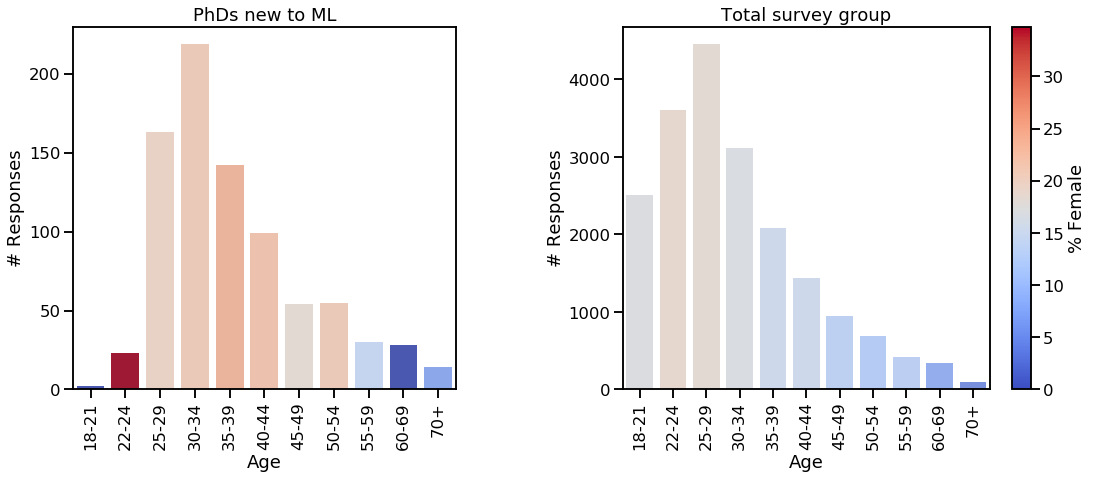

In [5]:
# import the multiple choice data
multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv", dtype = str) 
multiple_choice_question = multiple_choice_responses.head(1)
multiple_choice_responses.drop([0], inplace = True)

# calculate the ages and genders of the whole data set
all_by_age = multiple_choice_responses.groupby(['Q1'])['Time from Start to Finish (seconds)'].count().reset_index()
all_by_age.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)
all_by_age_gender = multiple_choice_responses.groupby(['Q1', 'Q2'])['Time from Start to Finish (seconds)'].count().reset_index()
all_by_age_gender.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)
all_by_age['gender_ratio'] = 0
for age in all_by_age.Q1.unique():
    females = all_by_age_gender.Count.loc[(all_by_age_gender.Q1 == age) & (all_by_age_gender.Q2 == 'Female')].values
    males = all_by_age_gender.Count.loc[(all_by_age_gender.Q1 == age) & (all_by_age_gender.Q2 == 'Male')].values
    all_by_age.gender_ratio.loc[all_by_age.Q1 == age] = 100.0 * females / (males + females)

# calculate the ages and genders for phd subgroup
phds_by_age = my_group2.groupby(['Q1'])['Time from Start to Finish (seconds)'].count().reset_index()
phds_by_age.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)
phds_by_age_gender = my_group2.groupby(['Q1', 'Q2'])['Time from Start to Finish (seconds)'].count().reset_index()
phds_by_age_gender.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)
phds_by_age['gender_ratio'] = 0
for age in phds_by_age.Q1.unique():
    females = phds_by_age_gender.Count.loc[(phds_by_age_gender.Q1 == age) & (phds_by_age_gender.Q2 == 'Female')].values
    if females.size == 0:
        females =0
    males = phds_by_age_gender.Count.loc[(phds_by_age_gender.Q1 == age) & (phds_by_age_gender.Q2 == 'Male')].values
    if males.size == 0:
        males =0    
    phds_by_age.gender_ratio.loc[phds_by_age.Q1 == age] = 100.0 * females / (males + females)    

# creating the barplots
cmap = matplotlib.cm.get_cmap('coolwarm')
question = 'Q1'
hue = 'gender_ratio'
fig = plt.figure(figsize = (20,8))
gs = fig.add_gridspec(1,5)
ax0 = fig.add_subplot(gs[:, :2])
ax1 = fig.add_subplot(gs[:, 2:])
palette, color_list = plot_style()
palette = 'coolwarm'
df_temp = pd.concat([phds_by_age[hue], all_by_age[hue]])
phds_by_age['color'] = (phds_by_age.gender_ratio - df_temp.min()) / (df_temp.max() - df_temp.min())
all_by_age['color'] = (all_by_age.gender_ratio - df_temp.min()) / (df_temp.max() - df_temp.min())
df_temp3 = phds_by_age.sort_values(by=['gender_ratio'])
color_list3 = cmap(df_temp3['color'])
df_temp2 = all_by_age.sort_values(by=['gender_ratio'])
color_list1 = cmap(df_temp2['color'])
norm = plt.Normalize(df_temp.min(), df_temp.max())
sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
sm.set_array([])
sns.barplot(x = phds_by_age[question], y = phds_by_age.Count, palette = color_list3[1:], hue = phds_by_age[hue], dodge=False, ax=ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('# Responses')
ax1 = plt.subplot(122)
sns.barplot(x = all_by_age[question], y = all_by_age.Count, palette = color_list1, hue = all_by_age[hue], dodge=False, ax=ax1)
plt.subplots_adjust(left=0.2, bottom=0.25, wspace = 0.2)
ax1.set_xlabel('Age')
ax1.set_ylabel('# Responses')
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax0.get_legend().remove()
ax1.get_legend().remove()
ax0.title.set_text('PhDs new to ML')
ax1.title.set_text('Total survey group')
cbar = plt.colorbar(sm)
cbar.set_label('% Female', rotation = 90)
plt.show()

I am curious if the people from my subgroup live in the same parts of the world as the rest as the respondees. It could be that in some cultures it is more common to pursue a PhD or to make a career switch. Below, first a world map showing the countries of the complete survey, and then a map with the countries of my subgroup. Note that the color scale is logaritmic and that countries without any respondents have been artificially set to log_count = 0. The two maps are very similar, so the chance of belonging to my subgroup does not seem to depend on the country of residence.

In [15]:
import plotly.express as px

# import the multiple choice data
multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv") 
multiple_choice_question = multiple_choice_responses.head(1)
multiple_choice_responses.drop([0], inplace = True)

countries = multiple_choice_responses.groupby('Q3')['Time from Start to Finish (seconds)'].count().reset_index()
countries.rename(columns={'Time from Start to Finish (seconds)': 'Count', 'Q3': 'country'}, inplace = True)
gapminder = px.data.gapminder().query("year==2007")
df_temp = pd.DataFrame(data = gapminder)
df = countries.merge(df_temp, on = 'country', how = 'outer')
df.fillna(1, inplace = True)
df['log_count'] = np.log(df.Count)
fig = px.choropleth(df, locations="iso_alpha",
                    color='log_count',
                    hover_name="country",
#                    color_continuous_scale=px.colors.sequential.Viridis)
                     color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(
    title_text = 'Countries of PhDs new to Data Science',
)
fig.show()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.



In [16]:
countries = my_group2.groupby('Q3')['Time from Start to Finish (seconds)'].count().reset_index()
countries.rename(columns={'Time from Start to Finish (seconds)': 'Count', 'Q3': 'country'}, inplace = True)
gapminder = px.data.gapminder().query("year==2007")
df_temp = pd.DataFrame(data = gapminder)
df = countries.merge(df_temp, on = 'country', how = 'outer')
df.fillna(1, inplace = True)
df['log_count'] = np.log(df.Count)
fig = px.choropleth(df, locations="iso_alpha",
                    color='log_count',
                    hover_name="Count",
#                    color_continuous_scale=px.colors.sequential.Viridis)
                     color_continuous_scale=px.colors.sequential.Blues)
                    
fig.update_layout(
    title_text = 'Countries all repondents in survey',
)                    
fig.show()

# Work situation

What is your job title? The both the answers of our subgroup and the answers of the of the complete survey group are plotted next to each other. A few important differences stand out. Of course our subgroup does not contain students, because we explicitely removed them. Further, there are relatively a lot of "research scientists" within our subgroup, which makes sense because such a function matches well with the skills learned during a PhD study. Also, there is a significant number of data scientists and data analyst within our subgroup, that is promissing for me! There are 213 data scientists, maybe this should be my final subgroup?


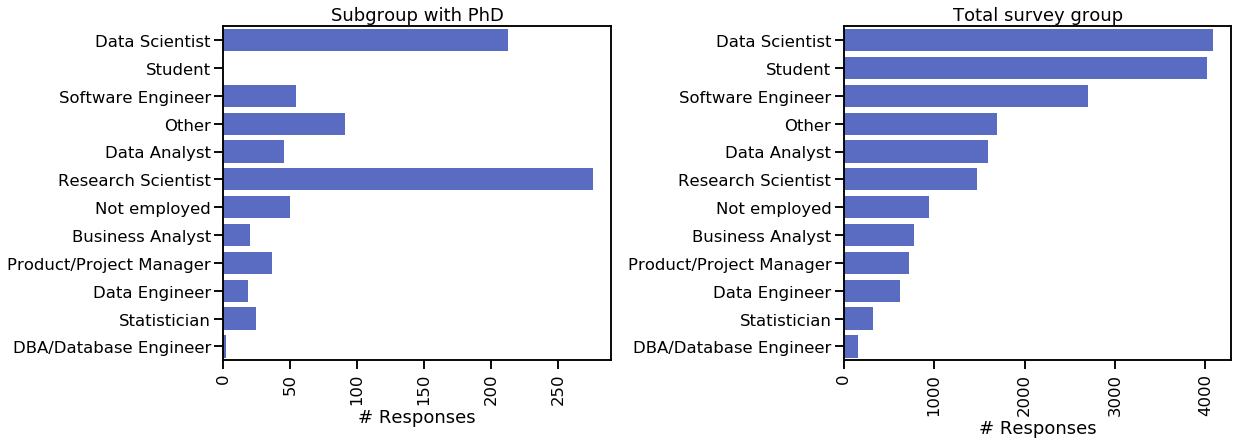

In [8]:
multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv", dtype = str)
multiple_choice_question = multiple_choice_responses.head(1)
multiple_choice_responses.drop([0], inplace = True)

phds_by_job = my_group2.groupby('Q5')['Time from Start to Finish (seconds)'].count().reset_index()
phds_by_job.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)
all_by_job = multiple_choice_responses.groupby('Q5')['Time from Start to Finish (seconds)'].count().sort_values(ascending=False).reset_index()
all_by_job.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)

fig = plt.figure(figsize = ([20, 8]))
ax0 = plt.subplot(121)
ax1 = plt.subplot(122)

palette, color_list = plot_style()

cmap = matplotlib.cm.get_cmap('coolwarm')
sns.barplot(y = phds_by_job['Q5'], x = phds_by_job['Count'], color = cmap(0.05), ax = ax0, order = all_by_job.Q5)
sns.barplot(y = all_by_job['Q5'], x = all_by_job['Count'], color = cmap(0.05), ax = ax1)
ax0.set_xlabel('# Responses')
ax0.set_ylabel('')
ax1.set_xlabel('# Responses')
ax1.set_ylabel('')
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
plt.subplots_adjust(left=0.2, bottom=0.3, wspace = 0.6)
plt.xticks(rotation = 90)
ax0.title.set_text('Subgroup with PhD')
ax1.title.set_text('Total survey group')
plt.show()

What are the tasks do the career switchers get at work compared to all data data scientists in the survey? The tasks are very comparable!

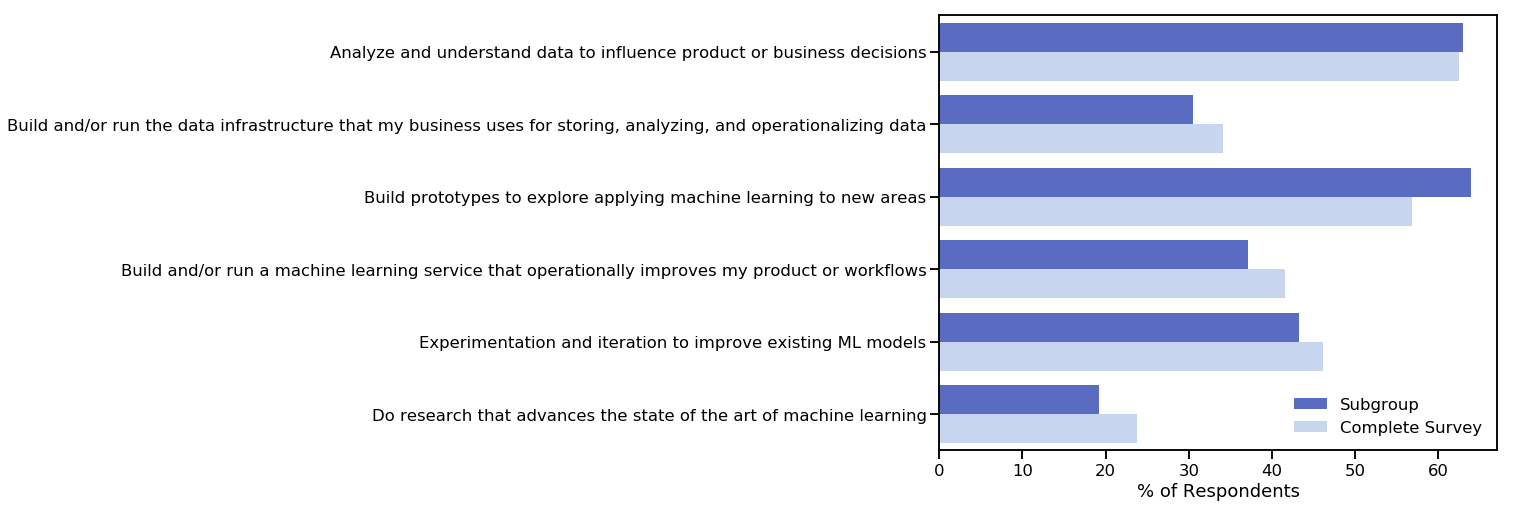

In [9]:
multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv",dtype = str) 
multiple_choice_question = multiple_choice_responses.head(1)
multiple_choice_responses.drop([0], inplace = True)
multiple_choice_responses = multiple_choice_responses.loc[multiple_choice_responses['Q5'] == 'Data Scientist']

option_cols = [c for c in multiple_choice_responses.columns if ('Q9' in c) & (c.lower()[-4:] != 'text') & ('7' not in c) & ('8' not in c)]
multiple_choice_responses = multiple_choice_responses[option_cols]
option_cols = [c for c in my_group2.columns if ('Q9' in c) & (c.lower()[-4:] != 'text')& ('7' not in c) & ('8' not in c)]
my_group3 = my_group2.loc[my_group2.Q5 == 'Data Scientist']
my_group3 = my_group3[option_cols]

# print(len(my_group3))
labels = np.c_[my_group3['Q9_Part_1'].dropna().reset_index().loc[0], my_group3['Q9_Part_2'].dropna().reset_index().loc[0], my_group3['Q9_Part_3'].dropna().reset_index().loc[0], my_group3['Q9_Part_4'].dropna().reset_index().loc[0], my_group3['Q9_Part_5'].dropna().reset_index().loc[0], my_group3['Q9_Part_6'].dropna().reset_index().loc[0]]

tasks0 = pd.DataFrame(data =  100 * my_group3.count() / len(my_group3), columns=['percentage_task'])
tasks0['group'] = 'Subgroup'
tasks0['task'] = labels[1,:]
tasks1 = pd.DataFrame(data =  100 * multiple_choice_responses.count() / len(multiple_choice_responses), columns=['percentage_task'])
tasks1['group'] = 'Complete Survey'
tasks1['task'] = labels[1,:]
tasks_complete = pd.concat([tasks0, tasks1])
palette, color_list = plot_style()
fig = plt.figure(figsize = ([10, 8]))
ax0 = plt.subplot(111)
cmap = matplotlib.cm.get_cmap('coolwarm')
sns.barplot(y = tasks_complete.task, x = tasks_complete.percentage_task, hue = tasks_complete.group, palette = [cmap(0.05), cmap(0.4)], ax = ax0)
ax0.set(xlabel='% of Respondents', ylabel='')
plt.legend(frameon = False, title = '')
plt.show()

Difference in salary between data scientists in the subgroup and data scientists in the complete survey? The distributions are comparable.

I am surprised about to find this bimodal distributions: one peaks seems centred at $50,000 to $59,999 and the other at $0 to $999. There are several explainations for this: there could be full timers and part timers in the data set, there could be large differences between countries, or the question was was confusing (monthly or yearly income?). 

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



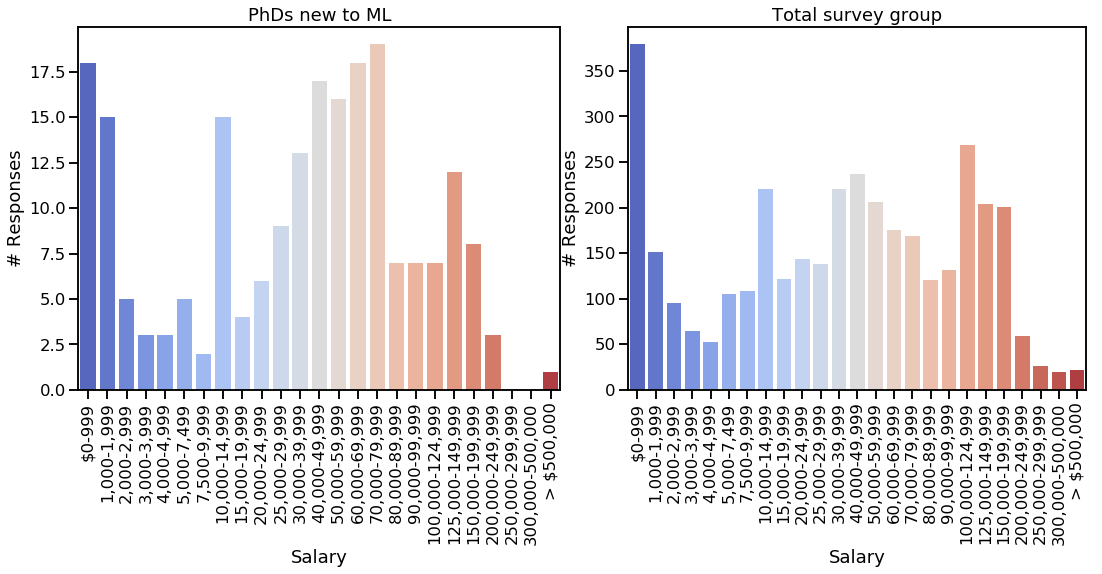

In [17]:
import re 

multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv") 
multiple_choice_question = multiple_choice_responses.head(1)
multiple_choice_responses.drop([0], inplace = True)
multiple_choice_responses = multiple_choice_responses.loc[multiple_choice_responses['Q5'] == 'Data Scientist']
my_group3 = my_group2.loc[my_group2.Q5 == 'Data Scientist']
# print(len(my_group3))

all_grouped_by_salary = multiple_choice_responses.groupby(['Q10'])['Time from Start to Finish (seconds)'].count().reset_index()
all_grouped_by_salary.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)
phds_grouped_by_salary = my_group3.groupby(['Q10'])['Time from Start to Finish (seconds)'].count().reset_index()
phds_grouped_by_salary.rename(columns={'Time from Start to Finish (seconds)': 'Count'}, inplace = True)

temp = [0] * len(all_grouped_by_salary.Q10)
for i in range(len(all_grouped_by_salary.Q10)):
    temp[i] = str(all_grouped_by_salary.Q10[i])
    temp[i] = temp[i].replace(',', '',)
    
all_grouped_by_salary['order'] = 0
for i in range(len(temp)):
    regex = r"(\d+)"
    match = re.search(regex, temp[i])
    all_grouped_by_salary.order[i]= match.group(1)

all_grouped_by_salary.sort_values(by=['order'], inplace = True)    
# creating the barplots
cmap = matplotlib.cm.get_cmap('coolwarm')
question = 'Q10'
# hue = 'gender_ratio'
fig = plt.figure(figsize = (20,8))
gs = fig.add_gridspec(4,4)
ax0 = fig.add_subplot(gs[:, :2])
ax1 = fig.add_subplot(gs[:, 2:])
palette, color_list = plot_style()
# palette = 'coolwarm'
# df_temp = pd.concat([phds_by_age[hue], all_by_age[hue]])
# phds_by_age['color'] = (phds_by_age.gender_ratio - df_temp.min()) / (df_temp.max() - df_temp.min())
# all_by_age['color'] = (all_by_age.gender_ratio - df_temp.min()) / (df_temp.max() - df_temp.min())
# df_temp3 = phds_by_age.sort_values(by=['gender_ratio'])
# color_list3 = cmap(df_temp3['color'])
# df_temp2 = all_by_age.sort_values(by=['gender_ratio'])
# color_list1 = cmap(df_temp2['color'])
# norm = plt.Normalize(df_temp.min(), df_temp.max())
# sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
# sm.set_array([])
sns.barplot(x = phds_grouped_by_salary[question], y = phds_grouped_by_salary.Count, palette = 'coolwarm', ax=ax0, order = all_grouped_by_salary.Q10)
ax0.set_xlabel('Salary')
ax0.set_ylabel('# Responses')
ax1 = plt.subplot(122)
sns.barplot(x = all_grouped_by_salary[question], y = all_grouped_by_salary.Count, palette = 'coolwarm', ax=ax1, order = all_grouped_by_salary.Q10)
plt.subplots_adjust(left=0.2, bottom=0.25, wspace = 0.2)
ax1.set_xlabel('Salary')
ax1.set_ylabel('# Responses')
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
# ax0.get_legend().remove()
# ax1.get_legend().remove()
ax0.title.set_text('PhDs new to ML')
ax1.title.set_text('Total survey group')
# cbar = plt.colorbar(sm)
# cbar.set_label('% Female', rotation = 90)
plt.show()


In [12]:
# multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv")   
# multiple_choice_question = multiple_choice_responses.head(1)
# multiple_choice_responses.drop([0], inplace = True)
# def cramers_v(confusion_matrix):
#     if confusion_matrix.size == 0:
#         return 0
#     else:
#         chi2 = ss.chi2_contingency(confusion_matrix)[0]
#         n = confusion_matrix.sum()
#         phi2 = chi2 / n
#         r, k = confusion_matrix.shape
#         phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#         rcorr = r - ((r-1)**2)/(n-1)
#         kcorr = k - ((k-1)**2)/(n-1)
#         return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# option_cols = [c for c in multiple_choice_responses.columns if not ('_' in c)]
# multiple_choice_responses = multiple_choice_responses[option_cols]

# corrM = np.zeros((len(option_cols),len(option_cols)))
# # there's probably a nice pandas way to do this
# for col1, col2 in itertools.combinations(option_cols, 2):
#     idx1, idx2 = option_cols.index(col1), option_cols.index(col2)
#     corrM[idx1, idx2] = cramers_v(pd.crosstab(multiple_choice_responses[col1], multiple_choice_responses[col2]).values)
#     corrM[idx2, idx1] = corrM[idx1, idx2]

# corr = pd.DataFrame(corrM, index=option_cols, columns=option_cols)
# fig, ax = plt.subplots(figsize=(20, 20))
# ax = sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
# ax.set_title("Cramer V Correlation between Variables");

I am training myself in Python in the hope that this will land me a job as a data scientist. Let's see if this is indeed the language my subgroup uses most:

In [ ]:
option_cols = [c for c in my_group2.columns if ('Q18' in c) & (c.lower()[-4:] != 'text') & ('TEXT' not in c)]
my_group3 = my_group2.loc[my_group2.Q5 == 'Data Scientist']
my_group3 = my_group3[option_cols]

# print(len(my_group3))
# labels = np.c_[my_group3['Q18_Part_1'].dropna().reset_index().loc[0], my_group3['Q18_Part_2'].dropna().reset_index().loc[0], my_group3['Q18_Part_3'].dropna().reset_index().loc[0], my_group3['Q9_Part_4'].dropna().reset_index().loc[0], my_group3['Q9_Part_5'].dropna().reset_index().loc[0], my_group3['Q9_Part_6'].dropna().reset_index().loc[0]]

# tasks0 = pd.DataFrame(data =  100 * my_group3.count() / len(my_group3), columns=['percentage_task'])
# tasks0['group'] = 'Subgroup'
# tasks0['task'] = labels[1,:]
# tasks1 = pd.DataFrame(data =  100 * multiple_choice_responses.count() / len(multiple_choice_responses), columns=['percentage_task'])
# tasks1['group'] = 'Complete Survey'
# tasks1['task'] = labels[1,:]
# tasks_complete = pd.concat([tasks0, tasks1])
palette, color_list = plot_style()
fig = plt.figure(figsize = ([10, 8]))
ax0 = plt.subplot(111)
cmap = matplotlib.cm.get_cmap('coolwarm')
sns.barplot(y = tasks_complete.task, x = my_group3.count(), hue = tasks_complete.group, palette = [cmap(0.05), cmap(0.4)], ax = ax0)
# ax0.set(xlabel='% of Respondents', ylabel='')
plt.legend(frameon = False, title = '')
plt.show()

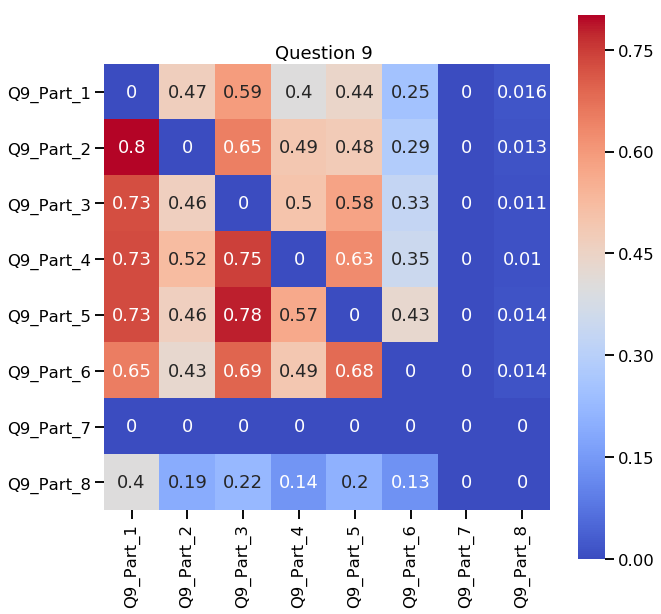

In [13]:
multiple_choice_responses = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv")   
multiple_choice_question = multiple_choice_responses.head(1)
multiple_choice_responses.drop([0], inplace = True)

option_cols = [c for c in multiple_choice_responses.columns if ('Q9' in c) & (c.lower()[-4:] != 'text')]
multiple_choice_responses = multiple_choice_responses[option_cols]
labels = multiple_choice_question[option_cols]

corrM = np.zeros((len(option_cols),len(option_cols)))
for col1, col2 in itertools.combinations(option_cols, 2):
    idx1, idx2 = option_cols.index(col1), option_cols.index(col2)
    confusion_matrix = pd.crosstab(multiple_choice_responses[col1], multiple_choice_responses[col2]).values
    if confusion_matrix.size == 0:
        corrM[idx1, idx2] = 0
        corrM[idx2, idx1] = 0
    else:
        corrM[idx1, idx2] = confusion_matrix[0] / len(multiple_choice_responses[col1].dropna())
        corrM[idx2, idx1] = confusion_matrix[0] / len(multiple_choice_responses[col2].dropna())

# # there's probably a nice pandas way to do this
# for col1, col2 in itertools.combinations(option_cols, 2):
#     idx1, idx2 = option_cols.index(col1), option_cols.index(col2)

#     corrM[idx1, idx2] = cramers_v(pd.crosstab(df_temp[col1], df_temp[col2]).values)
#     print(corrM[idx1, idx2])
#     corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=option_cols, columns=option_cols)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', square = True)
ax.set_title("Question 9 ");